In [26]:
import numpy as np
from matplotlib import pyplot as plt

**Задача 4.1.**  
  В таблице  4.1  приведены данные о численности населения некоторых крупнейших стран мира по годам с 1950 -2000 г.г. Заполнить последние два столбца таблицы (взять сведения из интернета).  На основе этих данных для конкретного варианта построить наилучший многочлен  по МНК.  Найти численность  населения страны  в 2019 году  и сравнить полученное значение  с актуальным значением (взять из интернета). 
  Решить ту же  задачу на основе интерполяционного многочлена.  То есть построить интерполяционный многочлен по значениям с 1950-2020 г.г. Вычислить значение  для 2019 года и сравнить с актуальными данными.
  
  **Страна: Индонезия**

Данные численности населения по годам:

Год | 1950 | 1960 | 1970 | 1980 | 1990 | 2000 | 2010 | 2020
--- | --- | --- | --- | --- | --- | --- | --- | --- |
Население| 77 | 98.5 | 124 | 148.5 | 184 | 228 | 241.8 | 273.5

Формируем массив аргументов и значений:

In [27]:
year = np.array([1950,1960,1970,1980,1990,2000,2010,2020])
population = np.array([77,98.5,124,148.5,184,228,241.8,273.5])

 #### Метод наименьших квадратов (МНК)
 
 Даны n+1 узел $x_i$ и значения в узлах $y_i$. Будем искать функцию в виде $ \Phi_m(x) = a_0 \varphi_0(x) + a_1 \varphi_1(x) + \dots + a_n \varphi_m(x) $. Значения этой функции в заданных узлах должны приближенно равнятся заданным значениям $y_i$ и как можно точнее. Другими словами, нам нужно минимизровать среднеквадратичное отклонение:
 $\sigma = \sqrt{\frac{1}{n + 1} \sum\limits_{i=0}^n (\Phi_m(x_i) - y_i)^2}$
 
 Рассмотрев необходимое условие экстремума квадрата среднеквадратичного отклонения, то есть равенство нулю частных производных, мы придём к системе, из которой будем находить необходимые нам коэфиценты $a_i$:

$ 
 \begin{equation*}
 \begin{cases}
   s_0a_0 + \cdots + s_ma_m = f_0 
   \\
   \cdots\cdots\cdots
   \\
   s_ma_0 + \cdots + s_{2m}a_m = f_m.
 \end{cases}
\end{equation*}
$

где $s_k =  \sum\limits_{i=0}^n x_i^k $ , $f_k = \sum\limits_{i=0}^n y_ix_i^k $

Напишем функцию, которая формирует нормальную систему метода наименьших квадратов, то есть возвращает матрицу S и вектор f системы $S \cdot a = f$

In [28]:
def SLE(x, y, _m): # Systems of Linear Equations
    n = x.shape[0]
    m = _m + 1
    S = np.zeros((m,m))
    f = np.zeros(m)
    for i in range(m):
        for j in range(m):
            for k in range(n):
                S[i][j] += x[k]**(i+j)
        for k in range(n):
            f[i] += y[k]*(x[k]**i)
    return S,f

В качесте апроксимирующих функций будем использовать степенной базис. То есть $P_n(x) = a_0 + a_1x + \dots + a_nx^n $



In [29]:
def P1(a, x): # MNK
    return np.sum([a[i]*(x**i) for i in range(a.shape[0])])

Рассмотрим для начала многочлен 3 степени.

In [30]:
S, f = SLE(year, population, 3)
print(S,"\n")
print(f)

[[8.00000000e+00 1.58800000e+04 3.15260000e+07 6.25957840e+10]
 [1.58800000e+04 3.15260000e+07 6.25957840e+10 1.24302282e+14]
 [3.15260000e+07 6.25957840e+10 1.24302282e+14 2.46871459e+17]
 [6.25957840e+10 1.24302282e+14 2.46871459e+17 1.07506864e+19]] 

[1.37530000e+03 2.74216800e+06 5.46814508e+09 1.09052363e+13]


Находим необходимые нам коэфиценты $a_i$ многочлена из решения системы $S \cdot a = f$:

Далее сравним со значением численности населения в 2019 году:

In [31]:
a1 = np.linalg.solve(S,f)

p2019 = 270.6 # реальное население в 2019 году
p2019_apr = P1(a1, 2019)

print("Значение апрокимирующей функции:",p2019_apr)
print("Разница с реальным значением:",abs(p2019_apr-p2019))

Значение апрокимирующей функции: 273.4823988016021
Разница с реальным значением: 2.8823988016020508


Рассмотрим теперь многочлен 4 степени:

In [32]:
S, f = SLE(year, population, 4)
with np.printoptions(precision=6):
    print(S,"\n")
with np.printoptions(precision=6):
    print(f)

[[ 8.000000e+00  1.588000e+04  3.152600e+07  6.259578e+10  1.243023e+14]
 [ 1.588000e+04  3.152600e+07  6.259578e+10  1.243023e+14  2.468715e+17]
 [ 3.152600e+07  6.259578e+10  1.243023e+14  2.468715e+17  1.075069e+19]
 [ 6.259578e+10  1.243023e+14  2.468715e+17  1.075069e+19 -3.155942e+17]
 [ 1.243023e+14  2.468715e+17  1.075069e+19 -3.155942e+17 -1.162552e+19]] 

[1.375300e+03 2.742168e+06 5.468145e+09 1.090524e+13 2.175099e+16]


Аналогично решаем систему и сравниваем значения:

In [33]:
a2 = np.linalg.solve(S,f)

p2019 = 270.6 # реальное население в 2019 году
p2019_apr = P1(a2, 2019)

print("Значение апрокимирующей функции:",p2019_apr)
print("Разница с реальным значением:",abs(p2019_apr-p2019))

Значение апрокимирующей функции: 270.6541660882805
Разница с реальным значением: 0.05416608828045355


Как видно многочлен 4 степени показал себя лучше для данного значения.
    Построим тепеь графики и посмотрим на целостную картину:

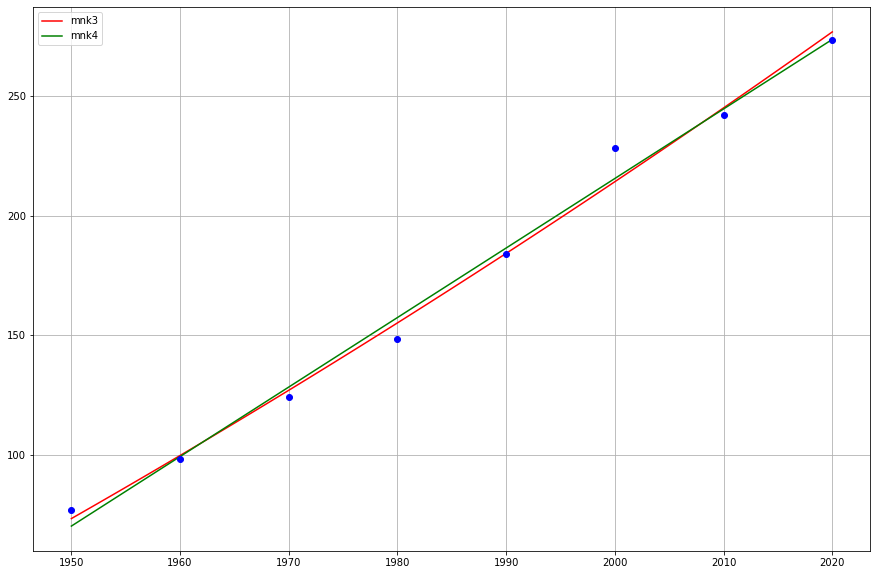

In [34]:
fig, axs = plt.subplots(1,1,figsize = (15,10))

axs.plot(np.arange(1950,2021),[P1(a1, x)  for x in range(1950,2021)], color = 'r', label = 'mnk3')
axs.plot(np.arange(1950,2021),[P1(a2, x)  for x in range(1950,2021)], color = 'g', label = 'mnk4')
axs.legend()

axs.grid()
axs.plot(year,population,'bo')

Как видно в целом многочлены не сильно заметно отличаются друг от друга.
Решим теперь ту же  задачу на основе интерполяционного многочлена. 

Так как шаг сетки постоянный (h=10), то можно воспользоваться многочленом Ньютона с конечными разностями.
Для этого нам потребуются разности k-ого порядка:

$\Delta f_i=y_{i+1}-y_i$

$\Delta^{k}f_i =\Delta^{k-1}f_{i + 1} - \Delta^{k-1}f_i$

Чтобы найти $\Delta^{k}f_i$ построим "треугольник конечных разностей" (который по сути диагональная матрица с ненулевыми элементами выше побочной диагонали) и взяв верхнюю часть треугольника (нулевую строку) получим необходимые нам разности. Понятно, что элементы в нулевом столбце матрицы это заданные значения $y_i$, а дальше просто по определению рекурентно определяем разности высших порядков.

Интегрпоялионный многочлен представляется в виде:
$ P_n(x) = f_0 + \frac{\Delta f_0}{1! h} (x - x_0) + \frac{\Delta^2 f_0}{2! h^2} (x - x_0) (x - x_1) + ... +  \frac{\Delta^n f_0}{n! h^n} (x - x_0) (x - x_1) ... (x - x_{n - 1}) $

где $\Delta^{k}f_i$ разности k-ого порядка, h - шаг таблицы.

In [35]:
def deltaF(y, n):
    dF = np.eye(n)
    for i in range(n):
        dF[i][0] = y[i]
    for j in range(1, n):
        for i in range(n - j):
            dF[i][j] = dF[i + 1][j - 1] - dF[i][j - 1]
    return dF[0]

In [36]:
from math import factorial

def P2(x, y, h, x0):
    n = x.shape[0]
    dF = deltaF(y, n)
    res = y[0]
    for i in range(1, n):
        p = dF[i] / (factorial(i) * h**i)
        for j in range(i):
            p *= (x0 - x[j])
        res += p
    return res

In [37]:
p2019 = 270.6 # реальное население в 2019 году
p2019_apr = P2(year, population, 10, 2019)

print("Значение апрокимирующей функции:",p2019_apr)
print("Разница с реальным значением:",abs(p2019_apr-p2019))

Значение апрокимирующей функции: 260.97670191712496
Разница с реальным значением: 9.623298082875067


Значение в 2019 многочлена Ньютона значительно отличается от реального и уступает в точности МНК. Сравним теперь эти методы на графиках:

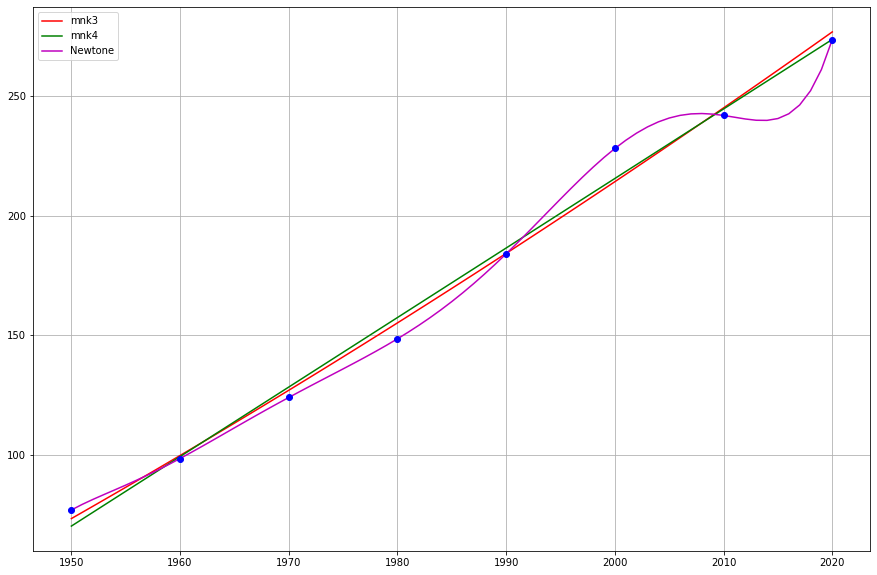

In [38]:
fig, axs = plt.subplots(1,1,figsize = (15,10))

axs.plot(np.arange(1950,2021),[P1(a1, x)  for x in range(1950,2021)], color = 'r', label = 'mnk3')
axs.plot(np.arange(1950,2021),[P1(a2, x)  for x in range(1950,2021)], color = 'g', label = 'mnk4')
axs.plot(np.arange(1950,2021),[P2(year,population,10, x)  for x in range(1950,2021)], color = 'm', label = 'Newtone')
axs.legend()

axs.grid()
axs.plot(year,population,'bo')

Как видно в узлах многочлен Ньютона принимает точные значения, значит многочлен построен правильно, но в окрестности некоторых точек значительно отклоняется от многочленов построенных МНК.

 **Задача 4.2.** Дана функция . Приблизить функцию  методом интерполяции, используя многочлен Лагранжа. Степень многочлена N подобрать таким образом, чтобы максимальная величина погрешности на отрезке  не превышала заданной величины Построить графики многочленов и графики погрешностей .Приблизить функцию  методом интерполяции, указанным в индивидуальном варианте (**Линейный сплайн**). Сравнить полученные результаты. 

Интерполяционный многочлен Лагранжа представляется в виде 
$L_n(x) = \sum\limits_{i=0}^n {y_i \prod\limits_{ k \neq i}{\frac{x - x_k}{x_i - x_k}}} $

Линейный сплайн представляет из себя 'совокупность' линейных функций, соединяющих заданые точки $(x_i,y_i)$ и $(x_{i+1},y_{i+1})$, поэтому на каждом промежутке $[x_i,x_{i+1}]$ будем находить такую линейную функцию. Сделать это достаточно просто: смещаем на $x_i$ и $y_i$ и находим угол, получится $f_i(x) = y_i + tg(\alpha)(x-x_i)$, где $\alpha$ - угол наклона, тангенс угла наклона для линейной функции между двумя точками находится как отношение приращения y и x, т.е $\frac{y_{i+1}-y_i}{x_{i+1}-x_i}$

Определяем функции интерполяционных многочленов:

In [39]:
def L(x,y,x0): # Lagrange 
    m = x.shape[0]
    res = 0
    for j in range(m):
        t1=1
        t2=1
        for i in range(m):
            if i!=j:
                t1 *= (x0-x[i])
                t2 *= (x[j]-x[i])
        res += y[j]*t1/t2
    return res

def S(x, y, x0): # Spline
    m = x.shape[0]
    res = 0
    for i in range (m - 1): # можно и бинарным поиском конечно найти, но не суть
        if x[i]<=x0<=x[i+1]:
            res = y[i]+(y[i+1]-y[i])*(x0-x[i])/(x[i+1]-x[i])
    return res

Искомая функция $f(x) = \frac{6sin(x)}{x}$

In [40]:
def f(x):
    return 6*np.sin(x)/x

# левая и правая границы отрезка
a = 5
b = 15
eps = 0.001

Найдём теперь оптимально значение N при котором будет достигаться точность. Для этого буду брать максимальное значение погрешности для каждого x из некоторого разбиения отрезка [a,b], скажем на 1000 отрезков для хорошей точности. То есть таким образом я буду считать погрешность не для одного какого-то значения а для 1001 и выбирать из них наибольшее. Тем самым мы добьёмся необходимой точности для каждого отрезка из полученого набора узлов.

In [41]:
x = np.linspace(a,b,1000)
y = f(x)

N1 = 2
xL = np.linspace(a,b,N1)
yL = f(xL)
Lg = [L(xL, yL, x0) for x0 in x]
while np.max(abs(y-Lg))>eps:
    N1 += 1
    xL = np.linspace(a,b,N1)
    yL = f(xL)
    Lg = [L(xL, yL, x0) for x0 in x]
print("N =", N1)

N = 12


Аналогично найдём N для линейного сплайна:

In [42]:
x = np.linspace(a,b,1000)
y = f(x)

N2 = 2
xS = np.linspace(a,b,N2)
yS = f(xS)
Sp = [S(xL, yL, x0) for x0 in x]
while np.max(abs(y-Sp))>eps:
    N2 += 1
    xS = np.linspace(a,b,N2)
    yS = f(xS)
    Sp = [S(xS, yS, x0) for x0 in x]
print("N =", N2)

N = 106


Весьма логично, что для линейного сплайна требуется поболее число узлов интерполяции.

Построим теперь графики погрешности $RL(x) = |f(x)-L(x)|$ и $RS(x) = |f(x)-S(x)|$

Построим для начала графики погрешностей для какого нибудь произвольного значения N, например N = 5. А далее построим графики погрешностей для найденных значений N1 и N2 и сравним их.

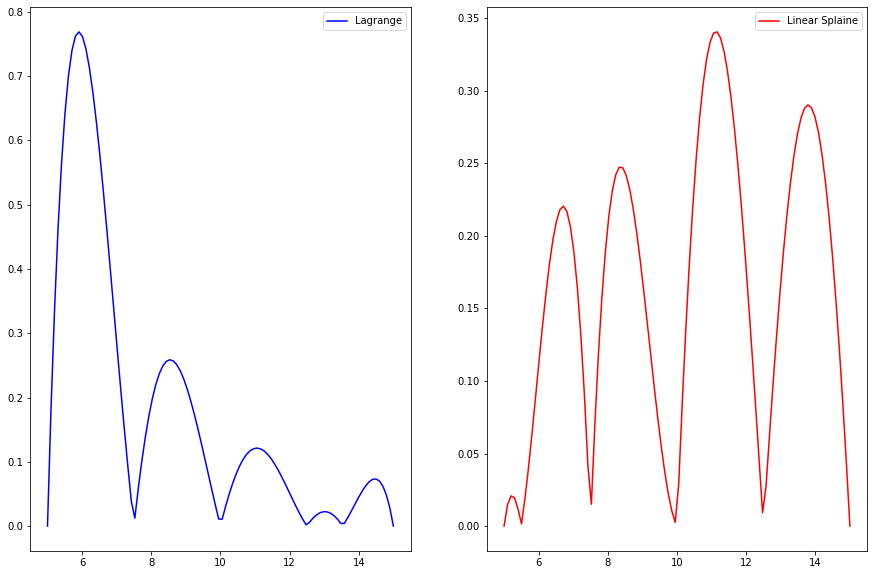

In [43]:
flg,axs = plt.subplots(1,2, figsize = (15,10))

N = 5

x = np.linspace(a,b,100)
y = f(x)

xL = np.linspace(a,b,N)
xS = np.linspace(a,b,N)
yL = f(xL)
yS = f(xS)

yL = [L(xL,yL,x0) for x0 in x]
yS = [S(xS,yS,x0) for x0 in x]

axs[0].plot(x,abs(y - yL), color = 'b', label = 'Lagrange')
axs[1].plot(x,abs(y - yS), color = 'r', label = 'Linear Splaine')

axs[0].legend()
axs[1].legend()

Как видно погрешность больше eps. Построим теперь многочлены для кол-ва узлов N1 и N2 для многочленов Лагранжа и Линейного сплайна соответственно.

Видно, что погрешность не превышает заданой величины eps и весьма уменьшилась в среднем:

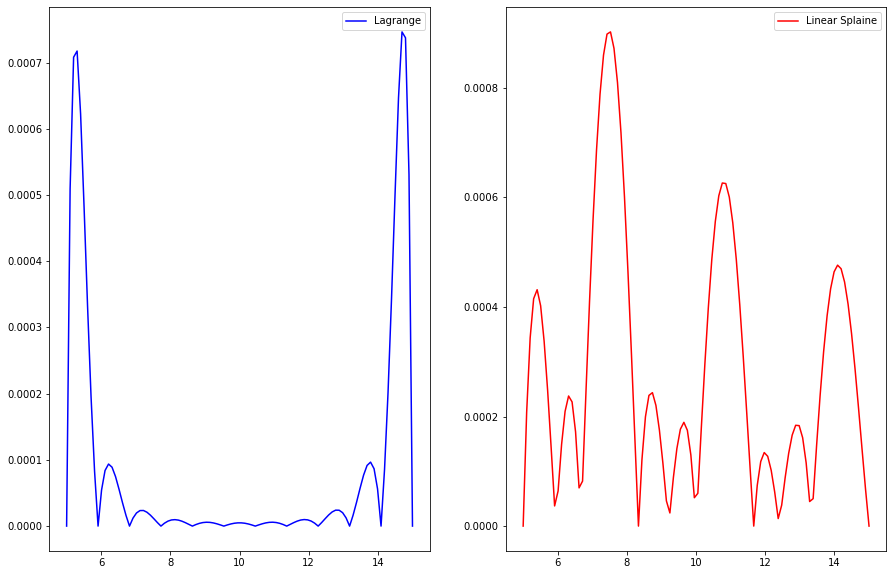

In [44]:
flg,axs = plt.subplots(1,2, figsize = (15,10))

x = np.linspace(a,b,100)
y = f(x)

xL = np.linspace(a,b,N1)
xS = np.linspace(a,b,N2)
yL = f(xL)
yS = f(xS)

yL = [L(xL,yL,x0) for x0 in x]
yS = [S(xS,yS,x0) for x0 in x]

axs[0].plot(x,abs(y - yL), color = 'b', label = 'Lagrange')
axs[1].plot(x,abs(y - yS), color = 'r', label = 'Linear Splaine')

axs[0].legend()
axs[1].legend()

Построим теперь на одном чертеже сообственно графики самих многочленов интерполирующих функций.

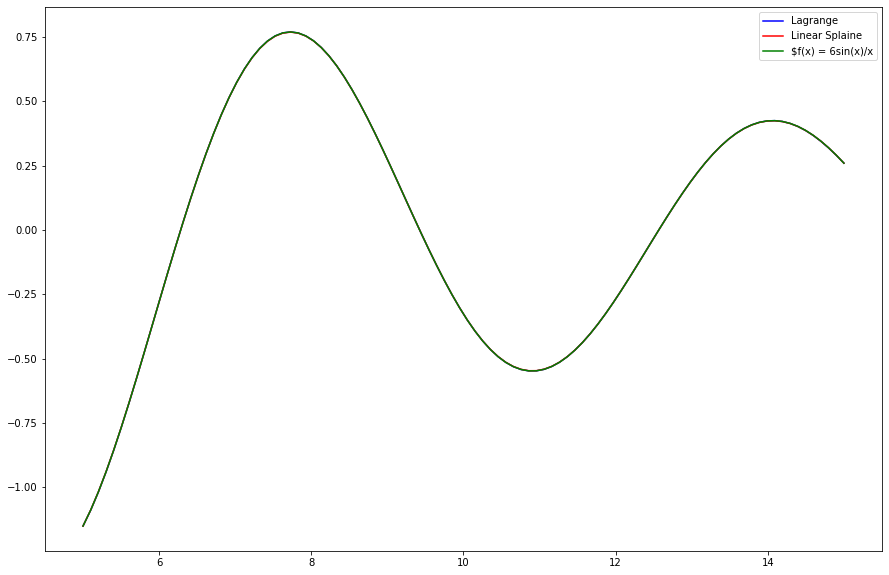

In [45]:
flg, axs = plt.subplots(1,1, figsize = (15,10))
axs.plot(x,yL, color = 'b', label = 'Lagrange')
axs.plot(x,yS, color = 'r', label = 'Linear Splaine')
axs.plot(x, y, color = 'g', label = '$f(x) = 6sin(x)/x')

axs.legend()

Как видно все три графика совпадают (с точностью до eps вообще говоря). Чтобы убедится, что все графики построились можно построить их отдельно:

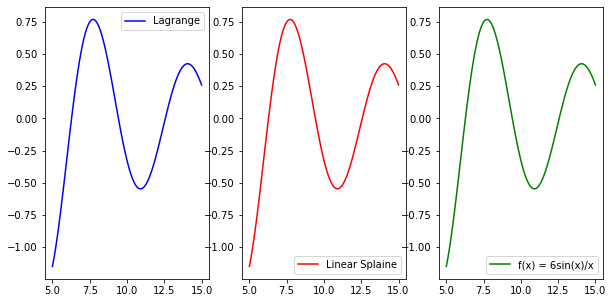

In [46]:
flg,axs = plt.subplots(1,3, figsize = (10,5))

axs[0].plot(x,yL, color = 'b', label = 'Lagrange')
axs[1].plot(x,yS, color = 'r', label = 'Linear Splaine')
axs[2].plot(x, y, color = 'g', label = 'f(x) = 6sin(x)/x')

axs[0].legend()
axs[1].legend()
axs[2].legend()

То есть при заданом значении eps и при зависящих от него значениях N1 и N2 мы получили весьма точное приближение к  графику исходной функции $f(x) = \frac{6sin(x)}{x}$ на отрезке [a,b] с помощью интерполяционных многочленов: многочлена Лагранжа и Линейного сплайна. То есть от исходных данных (числа узлов) вполне конкретно зависит точность нашего приближения к искомой функции.

**Задача 4.3.**  Задана функция f(x), определенная на отрезке [-1;1]. Требуется разложить функцию в ряд Тейлора в окрестности нуля с точностью $\epsilon$ и произвести экономизацию полученного степенного ряда. 

Искомая функция $f(x) = x^2(1-cos(x))$, преобразуем её в степенной ряд путём преобразований:

Разложим функцию cos(x) в ряд Тейлора: $cos(x) = \sum\limits_{n=1}^{\infty}\frac{(-1)^{n-1}x^{2n-2}}{(2n-2)!}$, $f(x) = x^2(1-\sum\limits_{n=1}^{\infty}\frac{(-1)^{n-1}x^{2n-2}}{(2n-2)!} = x^2 * \sum\limits_{n=2}^{\infty}\frac{(-1)^nx^{2n-2}}{(2n-2)!} = \sum\limits_{n=2}^{\infty}\frac{(-1)^nx^{2n}}{(2n-2)!}$,
Тут я сократил единицы, поменял знак у ряда(то есть степеь -1 в ряде) и домножил на $x^2$. То есть получили:
$$f(x) = \sum\limits_{n=2}^{\infty}\frac{(-1)^nx^{2n}}{(2n-2)!}$$
И определим также частичную сумму ряда $Sn(x,N) = \sum\limits_{n=2}^{N}\frac{(-1)^{n+1}x^{2n}}{(2n-2)!}$ или иначе $Sn(x,N) = \sum\limits_{n=1}^{N}\frac{(-1)^nx^{2n+2}}{(2n)!}$

In [53]:
from math import factorial

def f(x):
    return x*x*(1-np.cos(x))

def Sn(x,N):
    res = 0
    for n in range(1,N+1):
        res+=((-1)**(n+1)*x**(2*n+2))/factorial(2*n)
    return res

Посмотрим теперь сколько членов ряда нам необходимо взять, чтобы добится поставленной точности $\epsilon = 10^{-8}$

n = 5
2.0762526142803495e-09


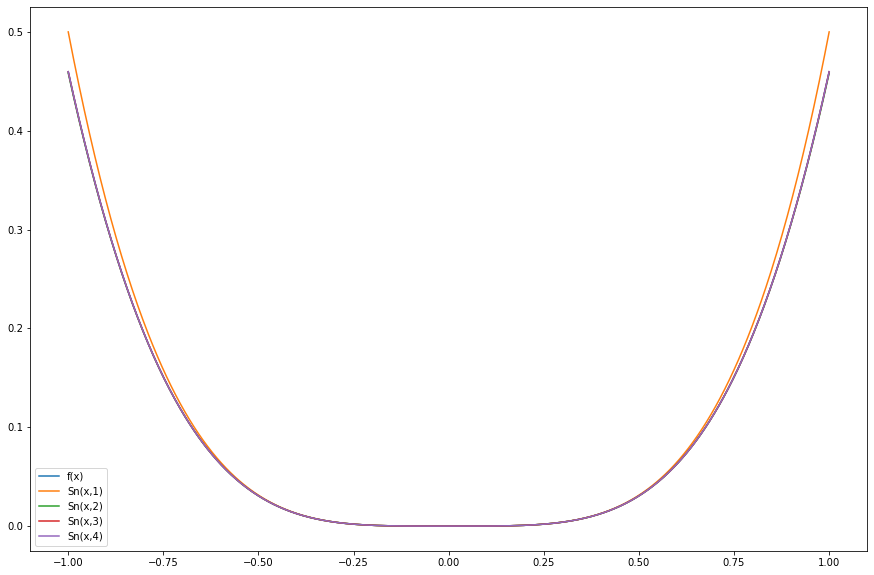

In [54]:
a = -1
b = 1
eps = 10**(-8)

x = np.linspace(a, b, 1000)

n = 1
fig, axs = plt.subplots(1, 1, figsize=(15, 10))
axs.plot(x,f(x),label = "f(x)")
while np.max(abs(Sn(x, n) - f(x))) > eps:
    axs.plot(x, Sn(x, n), label = f'Sn(x,{n})')
    n += 1
axs.legend()
print("n =", n)
print(np.max(abs(Sn(x, n) - f(x))))

Как видно по графику и из условий, мы отобрали необходимое количество членов ряда, получили ряд из 5ти членов, наибольшая степень - 2*5+2 = 12.

Для экономизации ряда нам необходимы многочлены Чебышева, они определятся рекуретно следующим образом:
$$T_0(x) = 1, T_1(x) = x, T_{n+1} = 2xT_{n}(x)-T_{n-1}(x)$$

In [49]:
def T(x, n): # Chebyshev
    if n == 0:
        return 1
    if n == 1:
        return x
    return 2*x*C(x, n - 1) - C(x, n - 2)

Теперь будем заменять высшие степени многочлена на формулы экономизации степенного ряда отбрасывая многочлены Чебышева. Самая большая степень в нашем многочлене - 12, поэтому определим функцию подстановки, заменим $x^{12}$ и посмотрим какая погрешность у нас получилась.

Выведем функцию экономизации для $x^{12}$:

$T_{11}(x) = 1024x^{11}-2816x^9+2816x^7-1232x^5+220x^3-11x$

$T_{10}(x) = 512^{10}-128x^8+1120x^6-400x^4+50x^2-1$

$T_{12}(x) = 2xT_{11}(x)-T_{10}(x)$, $T_{12}(x) = 2048x^{12} - 6144x^{10}+6912^8-3584x^6+840x^4-72x^2+1$

Отсюда $x^{12} = \frac{1}{2048}(6144x^{10}-6912^8+3584x^6-840x^4+72x^2-1+T_{12})$, $T_{12}$ далее отбрасываем

In [50]:
def x12(x):
    return (1/2048) * (6144*x**10-6912*x**8+3584*x**6-840*x**4+72*x**2-1)

d = np.max(abs(Sn(x, n-1) + (-1)**n/factorial(2*n)*x12(x) - f(x)))

print(d)

5.489355746624014e-07


Получили, что при замене $x^{12}$ точность стала меньше $\epsilon$, поэтому мы не можем произвести ни один этап экономизации. Графики погрешности без экономизации и при попытке первой экономизации:

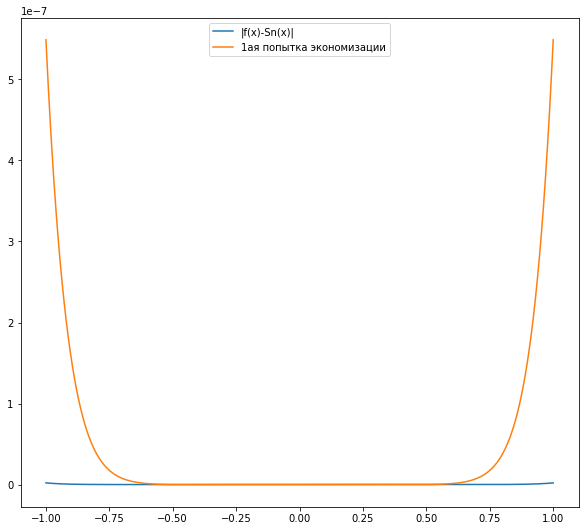

In [52]:
fig, axs = plt.subplots(1, 1, figsize = (10, 9))

axs.plot(x, abs(f(x) - Sn(x, n)), label = '|f(x)-Sn(x)|')
axs.plot(x, abs(Sn(x, n-1) + (-1)**n/factorial(2*n)*x12(x) - f(x)), label = '1ая попытка экономизации')

axs.legend()

То есть мы не можем экономизировать функцию ни одного раза, чтобы точность осталась $10^{-8}$